# 【Task3(2天)】PyTorch实现Logistic regression
1. PyTorch基础实现代码
2. 用PyTorch类实现Logistic regression,torch.nn.module写网络结构

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


生成数据

In [43]:
x = torch.unsqueeze(torch.linspace(-2,2,100),dim=1)
y = 3*x.pow(3)+1.2*x.pow(2)-3*x+3*torch.rand(x.size())

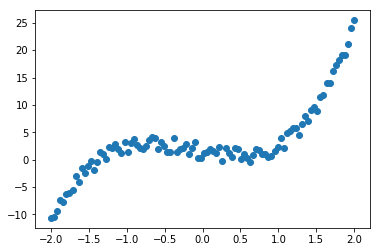

In [44]:
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

### 定义网络


In [47]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
     


In [48]:
# 打印出网络结构
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


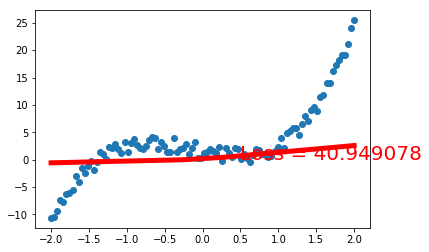

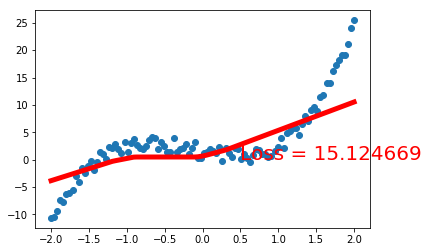

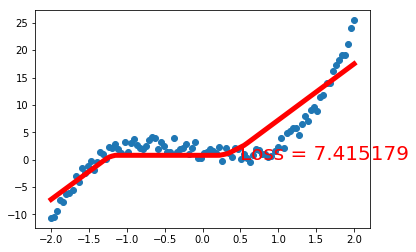

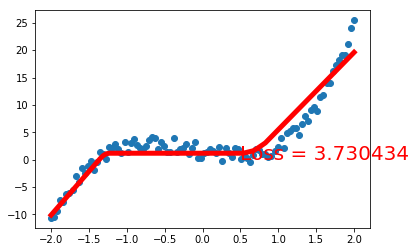

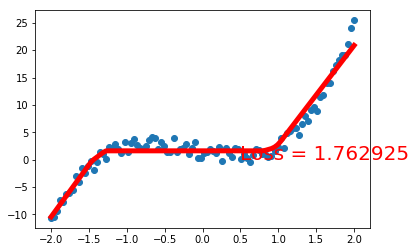

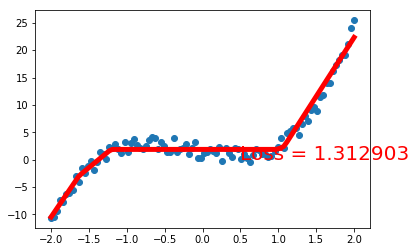

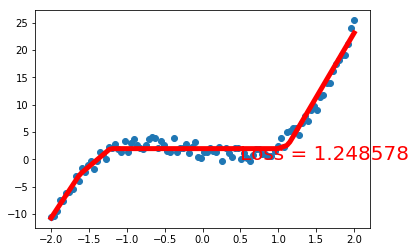

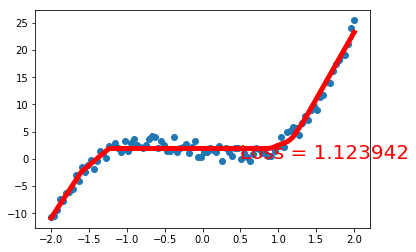

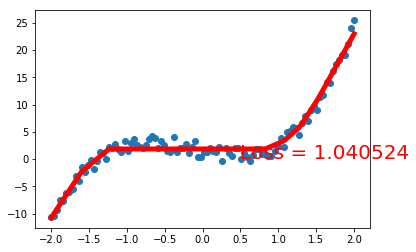

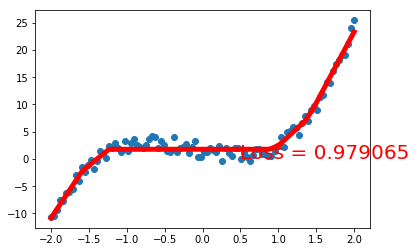

In [52]:
plt.ion()
# plt.show()
optimizer = torch.optim.Adam(net.parameters(),lr=0.2) # 使用adam来进行优化
loss_func = torch.nn.MSELoss() # 均方差

for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%10 ==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss = %4f'% loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
        
    plt.ioff()
    plt.show()
        